I have analysed Titanic data set.


In [1]:
#Now let's open the file with pandas
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


 Some basic questions:

    1.) Who were the passengers on the Titanic? 
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Question mentioned in the project discription:

    5.) What factors helped someone survive the sinking?

So let's start with the first question: Who were the passengers on the titanic?

In [3]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

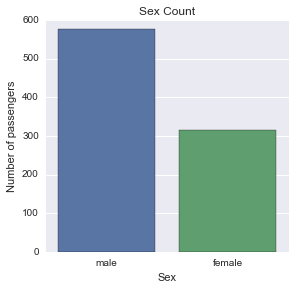

In [75]:
# Let's first check gender
sns.factorplot('Sex',data=titanic_df, kind = "count")
plt.title('Sex Count')
plt.ylabel('Number of passengers')
plt.show()

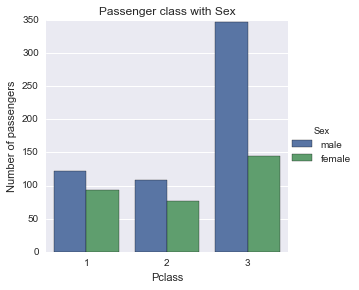

In [76]:
# Now let's seperate the genders by classes, using 'hue' arguement.
sns.factorplot('Pclass',data=titanic_df,hue='Sex', kind = "count")
plt.title('Passenger class with Sex')
plt.ylabel('Number of passengers')
plt.xlabel('Pclass')
plt.show()

There are more males in the 3rd class than females. Lets  find the split between males,females,and children. 

In [77]:
# We'll treat anyone under 16 as a child, and then use the apply technique with a function to create a new column
# First let's make a function to sort through the sex 

def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [78]:
# Let's check the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Adults
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,Seniors
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes,Adults
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes,Children


 Now we have seperated the passengers between female,male,and child. It will help beacuse Women and children are saved first always.

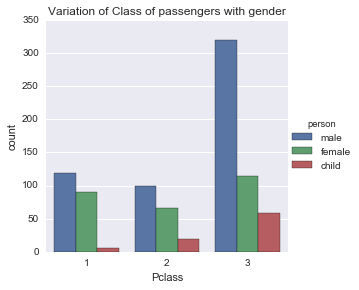

In [79]:
# Let's try the factorplot again!
sns.factorplot('Pclass',data=titanic_df,hue='person', kind = "count")
plt.title('Variation of Class of passengers with gender')
plt.show()

 Quite a bit of children in 3rd class and not so many in 1st.

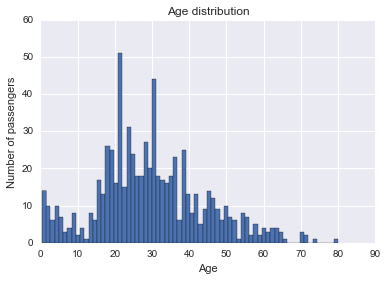

In [80]:
# Let's create a distribution of the ages for the passengers.
titanic_df['Age'].hist(bins=70)
plt.title('Age distribution')
plt.ylabel('Number of passengers')
plt.xlabel('Age')
plt.show()

In [81]:
# Comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

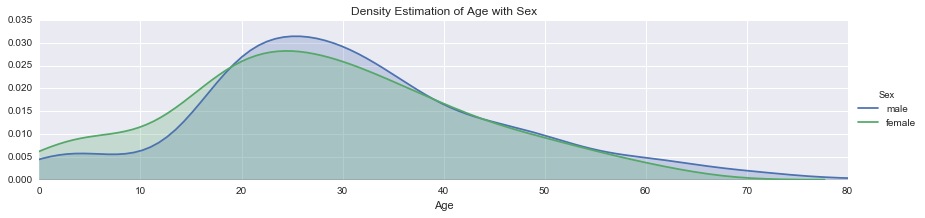

In [111]:
# Lets use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

#  Map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Setting x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()
plt.title('Density Estimation of Age with Sex')
plt.xlabel('Age')
plt.show()

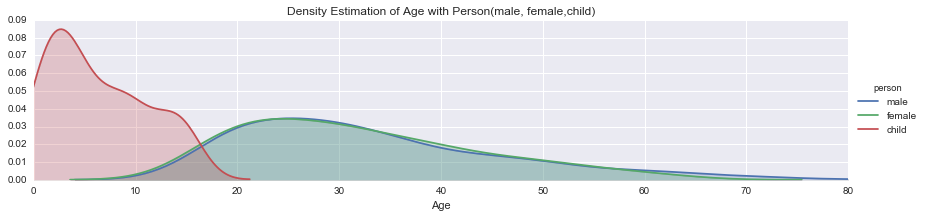

In [112]:
# Now,plot including children:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.title('Density Estimation of Age with Person(male, female,child)')
plt.xlabel('Age')
plt.show()

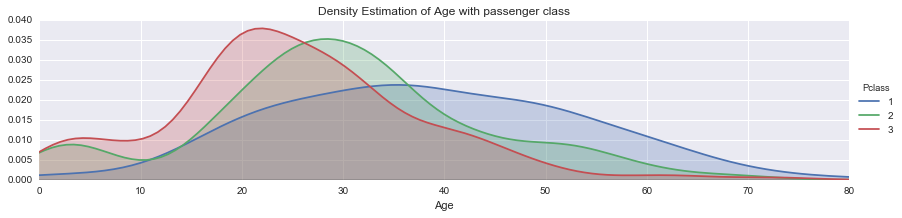

In [113]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.title('Density Estimation of Age with passenger class')
plt.xlabel('Age')
plt.show()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. 
Q2 : What deck were the passengers on and how does that relate to their class?

In [85]:
#  quick look at our dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Adults


So, the Cabin column has information on the deck, but it has several NaN values, so let's drop them.

In [86]:
# dropping the NaN values to a new object
deck = titanic_df['Cabin'].dropna()

In [87]:
#  preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

 Only need the first letter of the deck is required to classify its level (e.g. A,B,C)

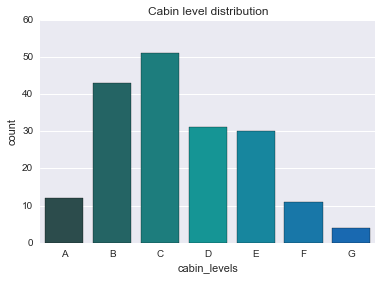

In [168]:
# plotting cabin levels
titanic_df= titanic_df.dropna()
df= titanic_df
df["cabin_levels"] = df["Cabin"].apply(lambda x : x[0],1)
sns.countplot(x="cabin_levels",data= df,palette='winter_d',order =["A","B","C","D","E","F","G"])
plt.title("Cabin level distribution")
plt.show()

In [167]:
df

  A 'T' deck value is observed which doesn't make sense,So, dropped it out.

Q3: Where did the passengers come from?

In [89]:
# Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Adults


From Kaggle C,Q,S stand for Cherbourg, Queenstown, Southhampton respectively

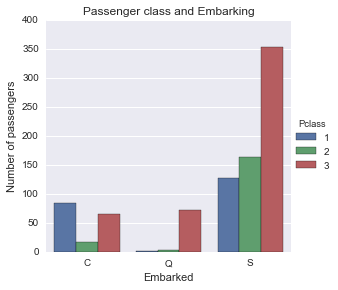

In [90]:
# Factorplot to check out the results
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'], kind = "count")
plt.title('Passenger class and Embarking')
plt.ylabel('Number of passengers')
plt.show()

In Queenstown, almost all the passengers that boarded there were 3rd class. 

Now let's take a look at the 4th question:

Q4: Who was alone and who was with family?

In [91]:
# Let's add a new column for alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64


Let's change the column now so that if the value is greater than 0, i.e. passenger was with his/her family, otherwise they were alone.


In [92]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [93]:
# checking dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,Adults


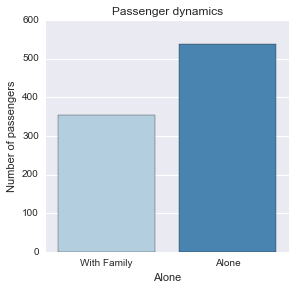

In [94]:
# factorplot to see results
sns.factorplot('Alone',data=titanic_df,palette='Blues', kind = "count")
plt.title('Passenger dynamics')
plt.ylabel('Number of passengers')
plt.show()

 Main question : What factors helped someone survive the sinking?*

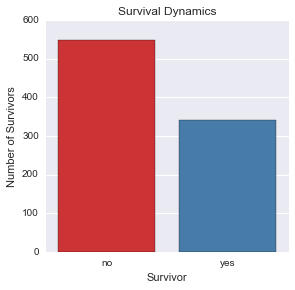

In [95]:
# Creating a new column for survival purposes through mapping
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor',data=titanic_df,palette='Set1', kind = "count")
plt.title('Survival Dynamics')
plt.ylabel('Number of Survivors')
plt.show()

In [96]:
# Lets check the figures ! 
#Number of passengers who survived -
(titanic_df["Survived"]==1).sum()

342

In [97]:
#Number of passengers who couldn't survive -
(titanic_df["Survived"]!=1).sum()

549

More people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate.

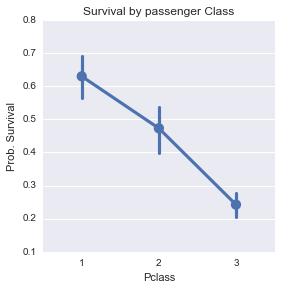

In [98]:
# Using factor plot again
sns.factorplot('Pclass','Survived',data=titanic_df)
plt.title('Survival by passenger Class')
plt.ylabel('Prob. Survival')
plt.show()

In [99]:
#Let's see the survival probability in various classes-
titanic_df["Survived"].groupby(titanic_df["Pclass"]).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rates for the 3rd class are substantially lower. But there are more men in the 3rd class . Using 'hue' to check whether women and children are saved first.

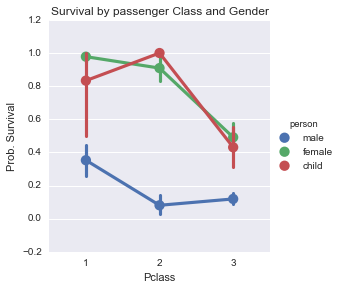

In [100]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)
plt.title('Survival by passenger Class and Gender')
plt.ylabel('Prob. Survival')
plt.show()

In [101]:
#Let's see the survival probability in various classes with respect to person(child,male and female)-
titanic_df["Survived"].groupby([titanic_df["Pclass"],titanic_df["person"]]).mean()

Pclass  person
1       child     0.833333
        female    0.978022
        male      0.352941
2       child     1.000000
        female    0.909091
        male      0.080808
3       child     0.431034
        female    0.491228
        male      0.119122
Name: Survived, dtype: float64

It looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class survival rate is low.

Lets check if age has an effect on survival rate?

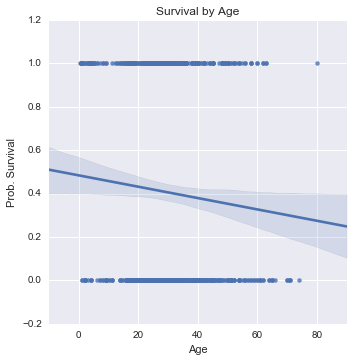

In [102]:
# using a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)
plt.title('Survival by Age')
plt.ylabel('Prob. Survival')
plt.show()

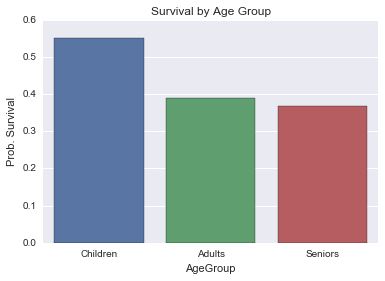

In [103]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0,16,40,90], labels=['Children','Adults','Seniors'])
sns.barplot(x="AgeGroup", y="Survived", data=titanic_df,ci=None)
plt.title('Survival by Age Group')
plt.ylabel('Prob. Survival')
plt.show()

In [104]:
#Let's see the survival probability in various age groups-
titanic_df["Survived"].groupby(titanic_df["AgeGroup"]).mean()

AgeGroup
Children    0.550000
Adults      0.387931
Seniors     0.366667
Name: Survived, dtype: float64

Looks like  older passengers were  less likely to survive.  using hue to take a look at the effect of class and age.

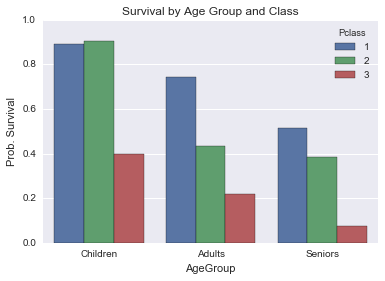

In [105]:
# Lets plot survival by age group and passenger class-
sns.barplot(x="AgeGroup", y="Survived",hue='Pclass', data=titanic_df,ci=None)
plt.title('Survival by Age Group and Class')
plt.ylabel('Prob. Survival')
plt.show()

In [106]:
#Let's see the survival probability in various classes with respect to person(child,male and female)-
titanic_df["Survived"].groupby([titanic_df["AgeGroup"],titanic_df["Pclass"]]).mean()

AgeGroup  Pclass
Children  1         0.888889
          2         0.904762
          3         0.400000
Adults    1         0.742574
          2         0.432203
          3         0.220408
Seniors   1         0.513158
          2         0.382353
          3         0.075000
Name: Survived, dtype: float64

Again, Survival is challenged with decreasing class of passenger and age too has similar effect. Older the passenger and lower the class, survival is much more challenged.

Now, let's relate gender and age with the survival.

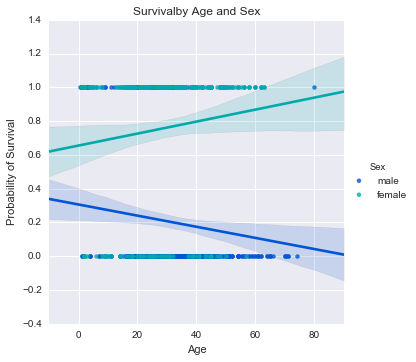

In [109]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter')
plt.title('Survivalby Age and Sex')
plt.ylabel('Probability of Survival')
plt.xlabel('Age')
plt.show()

Data Wrangling Answers

In [108]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
Alone          891 non-null object
Survivor       891 non-null object
AgeGroup       714 non-null category
dtypes: category(1), float64(2), int64(5), object(8)
memory usage: 105.4+ KB


Here in the data, "Age", "Cabin" and "embarked" has null values.

The NaN values in cabin were dropped before analysis and plotting of passengers in various cabins.Also, a "T" deck value was observed in the plot. So, it was also removed. It didn't make any sense.

Null values were not removed from "Age" and "Embarked" column. "Embarked" had only two null values. Not removing NaN values from "Embarked" didn't adversely affect the analysis. However, "Age" had a higher number of missimg values. Survival by age had been affected a bit, due to missing values but the assumption was held true despite of missing values that children had higher chances of survival and old people had pretty less chances to survive. And, outliers were not removed from any column. 

Three new columns were introduced in the dataset viz, "Person", "Alone" and "Survivor"

 "Person" was introduced to determine whether the passenger was a child, male or female. It hepled in analysis as we had an assumption that children and females are given priority in case of emergency.If the age of passenger was less than 16 years, it was classified as child.

"Alone" was introduced to determine whether the passenger was travelling alone or had siblings onboard. If SibSp was 0 for a passenger that means he was travelling alone.

"Survivor" was introduced to determine whether a person survived the catastrophe or not. 

"Age Group" was introduced to categorise passengers into groups on the basis of their ages to analyse the chances of survival in different age groups. 

Conclusion:
The data included a good amount of information about the passengers which helped to study the survival probability of passengers. 
As a result of our analysis,being male strongly and negatively affected survival. Also, when we grouped data according to Passenger class,we found that there were more males in 3rd class. Though, survival rate was lower in third class but presence of more males in third class too skewed the figure.Also, being old didn't favour survival and it was reflected in all the passenger classes. However, being a female or a child sharply increased the chances of survival, going by the theory that children and females are favoured in case of emergencies.
Also, missing values in the age column posed difficulty in analysis and affected the outcomes but using groups for analysis, helped to overcome this difficulty.